# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Ferrenti summary"
InsertApproach = "01-ferrenti-approach"
numberOfPrincipalComponents = 50

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|nelements,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-7,S6,2.0,16,-0.261676,2.0,16,-0.261676,1.000000,1.000000,...,3.440,0.000070,148,0.000034,1,0.348895,2.4881,2.490,0,1.0
1,mp-14,Se3,2.0,34,-0.245806,2.0,34,-0.245806,1.000000,1.000000,...,3.010,0.000062,152,0.000000,1,1.879425,1.0119,0.997,0,1.0
2,mp-19,Te3,2.0,52,-0.226594,2.0,52,-0.226594,1.000000,1.000000,...,3.166,0.000054,152,0.000000,1,5.455518,0.5752,0.000,0,1.0
3,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,3.223,0.000086,194,0.000000,1,9.983070,3.3395,3.166,0,1.0
4,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,4.279,0.000086,227,0.000000,1,9.614764,4.3387,3.593,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.690,0.000052,3,0.000351,4,3.917413,2.3186,2.156,1,0.0
1521,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.749,0.000060,1,0.992766,4,3.987258,0.8079,0.000,1,0.0
1522,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.841,0.000060,5,6.504784,2,4.184540,0.1221,0.000,1,0.0
1523,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.725,0.000061,4,0.000485,3,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(23676, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.998062,1.0,0.963855,1.0,0.654658,1.0,0.657824
42,mp-370,Cd1S1,CdS,1.0,0.961641,1.0,1.000000,1.0,0.837287,1.0,0.984985
44,mp-380,Zn2Se2,ZnSe,1.0,0.929532,1.0,0.571429,1.0,0.783659,1.0,0.933801
82,mp-661,Al2N2,AlN,1.0,0.934956,1.0,1.000000,1.0,0.727745,1.0,0.914860
83,mp-672,Cd2S2,CdS,1.0,0.938318,1.0,0.963855,1.0,0.775761,1.0,0.915263
...,...,...,...,...,...,...,...,...,...,...,...
22989,mp-1202959,Zn18S18,ZnS,1.0,0.598654,0.0,0.398058,1.0,0.723453,1.0,0.903432
23181,mp-1203645,C48,C,1.0,0.997813,0.0,0.000000,1.0,0.731051,1.0,0.864629
23281,mp-1204046,Si106,Si,1.0,0.978694,1.0,0.888889,1.0,0.878261,1.0,0.951763
23351,mp-1204356,Si19C19,SiC,1.0,0.984569,1.0,0.973333,1.0,0.651459,1.0,0.931044


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
37,mp-344,B4N4,BN,1.0,0.899868,1.0,1.000000,1.0,0.658296,1.0,0.665180
123,mp-984,B2N2,BN,1.0,0.997285,0.0,0.155779,1.0,0.822770,1.0,0.982197
180,mp-1434,Mo1S2,MoS2,1.0,0.546714,0.0,0.155779,1.0,0.665357,1.0,0.612997
202,mp-1599,B4N4,BN,0.0,0.276199,0.0,0.155779,0.0,0.474205,0.0,0.143234
203,mp-1639,B1N1,BN,1.0,0.997880,1.0,1.000000,1.0,0.643397,0.0,0.497304
327,mp-2653,B2N2,BN,1.0,0.917906,0.0,0.375000,1.0,0.618890,0.0,0.273401
1761,mp-7991,B2N2,BN,1.0,0.968557,1.0,1.000000,1.0,0.773868,1.0,0.974094
2322,mp-9813,W1S2,WS2,1.0,0.950831,0.0,0.155779,1.0,0.633341,0.0,0.498546
2830,mp-13151,B4N4,BN,1.0,0.996179,1.0,0.571429,1.0,0.620477,1.0,0.648110
4786,mp-20305,In1As1,InAs,1.0,0.903424,1.0,0.574468,1.0,0.733095,1.0,0.890540


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.998062,1.0,0.963855,1.0,0.654658,1.0,0.657824
2,mp-25,N8,N2,1.0,0.999899,1.0,1.000000,1.0,0.597022,1.0,0.893699
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
5,mp-137,Ge12,Ge,1.0,0.999712,1.0,0.963855,1.0,0.874869,1.0,0.934329
6,mp-154,N8,N2,1.0,0.999749,1.0,1.000000,1.0,0.592349,1.0,0.856954
...,...,...,...,...,...,...,...,...,...,...,...
23667,mp-1288734,Y4Co4O12,YCoO3,1.0,0.676404,1.0,0.764706,1.0,0.677380,1.0,0.668194
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.990963,1.0,0.905263,1.0,0.806750,1.0,0.939011
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.660647,1.0,0.574468,1.0,0.515811,1.0,0.570798


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
5,mp-137,Ge12,Ge,1.0,0.999712,1.0,0.963855,1.0,0.874869,1.0,0.934329
16,mp-230,Sb8O16,SbO2,1.0,0.989553,1.0,0.905263,1.0,0.805333,1.0,0.865996
26,mp-286,Yb1Se1,YbSe,1.0,0.999295,1.0,0.963855,1.0,0.847884,1.0,0.984715
38,mp-358,Hg3Te3,HgTe,1.0,0.998881,1.0,0.963855,1.0,0.808554,1.0,0.896130
...,...,...,...,...,...,...,...,...,...,...,...
23610,mp-1205386,Sr4Al8Si8O32,SrAl2(SiO4)2,1.0,0.981621,1.0,0.993443,1.0,0.836688,1.0,0.991328
23612,mp-1205391,Ta4Sb4O16,TaSbO4,1.0,0.998329,1.0,0.993443,1.0,0.871270,1.0,0.991417
23620,mp-1205425,Ba8Ca1Y2U4O24,Ba8CaY2U4O24,1.0,0.895189,1.0,0.993443,1.0,0.809454,1.0,0.954443
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-24,C8,C,1.0,0.998062,1.0,0.963855,1.0,0.654658,1.0,0.657824
2,mp-25,N8,N2,1.0,0.999899,1.0,1.000000,1.0,0.597022,1.0,0.893699
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
5,mp-137,Ge12,Ge,1.0,0.999712,1.0,0.963855,1.0,0.874869,1.0,0.934329
6,mp-154,N8,N2,1.0,0.999749,1.0,1.000000,1.0,0.592349,1.0,0.856954
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.990963,1.0,0.905263,1.0,0.806750,1.0,0.939011
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.660647,1.0,0.574468,1.0,0.515811,1.0,0.570798
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.932559,1.0,0.963855,1.0,0.764782,1.0,0.955374


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
5,mp-137,Ge12,Ge,1.0,0.999712,1.0,0.963855,1.0,0.874869,1.0,0.934329
8,mp-160,B12,B,1.0,0.995560,1.0,0.973333,1.0,0.789138,1.0,0.930195
13,mp-216,Sc16O24,Sc2O3,1.0,0.990915,1.0,0.993443,1.0,0.797434,1.0,0.971323
16,mp-230,Sb8O16,SbO2,1.0,0.989553,1.0,0.905263,1.0,0.805333,1.0,0.865996
...,...,...,...,...,...,...,...,...,...,...,...
23637,mp-1208777,Sr3Nb1Ga3Si2O14,Sr3NbGa3(SiO7)2,1.0,0.785281,1.0,0.905263,1.0,0.758461,1.0,0.799535
23665,mp-1278154,Sr4Fe2W2O12,Sr2FeWO6,1.0,0.856845,1.0,0.993443,1.0,0.778124,1.0,0.900955
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.990963,1.0,0.905263,1.0,0.806750,1.0,0.939011


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.834910,0.0,0.155779,1.0,0.658397,1.0,0.669302
1,mp-24,C8,C,1.0,0.998062,1.0,0.963855,1.0,0.654658,1.0,0.657824
2,mp-25,N8,N2,1.0,0.999899,1.0,1.000000,1.0,0.597022,1.0,0.893699
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
4,mp-118,P24,P,1.0,0.996228,0.0,0.398058,1.0,0.825596,1.0,0.902086
...,...,...,...,...,...,...,...,...,...,...,...
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.990963,1.0,0.905263,1.0,0.806750,1.0,0.939011
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.660647,1.0,0.574468,1.0,0.515811,1.0,0.570798
23674,mp-1542038,Cs2Sn2Se6,CsSnSe3,1.0,0.932559,1.0,0.963855,1.0,0.764782,1.0,0.955374


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
0,mvc-12905,Fe4O8,FeO2,1.0,0.834910,0.0,0.155779,1.0,0.658397,1.0,0.669302
1,mp-24,C8,C,1.0,0.998062,1.0,0.963855,1.0,0.654658,1.0,0.657824
2,mp-25,N8,N2,1.0,0.999899,1.0,1.000000,1.0,0.597022,1.0,0.893699
3,mp-111,Ne1,Ne,1.0,0.999999,1.0,0.973333,1.0,0.806688,1.0,0.952237
4,mp-118,P24,P,1.0,0.996228,0.0,0.398058,1.0,0.825596,1.0,0.902086
...,...,...,...,...,...,...,...,...,...,...,...
23667,mp-1288734,Y4Co4O12,YCoO3,1.0,0.676404,1.0,0.764706,1.0,0.677380,1.0,0.668194
23671,mp-1304797,Sr12In4Ni4O24,Sr3InNiO6,1.0,0.982875,1.0,0.892857,1.0,0.817868,1.0,0.862356
23672,mp-1541522,Bi2P2O8,BiPO4,1.0,0.990963,1.0,0.905263,1.0,0.806750,1.0,0.939011
23673,mp-1541714,Cs3As2Cl9,Cs3As2Cl9,1.0,0.660647,1.0,0.574468,1.0,0.515811,1.0,0.570798


In [17]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


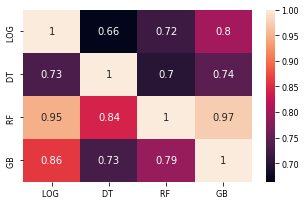

[1.0, 0.6634714410203597, 0.5320115926755368, 0.4914372282966671, 0.7262140537114791, 0.7000395204847846, 0.7900803583190621, 1.0, 1.0, 0.8008598312783907, 0.7167698590436042]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
LOG LOG LOG DT,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
LOG LOG RF DT,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
LOG RF GB DT,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
DT GB DT DT,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
DT RF DT DT,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
RF RF GB GB,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
RF RF RF RF,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
GB GB GB GB,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677
GB LOG LOG LOG,1.0,0.663471,0.532012,0.491437,0.726214,0.70004,0.79008,1.0,1.0,0.80086,0.71677


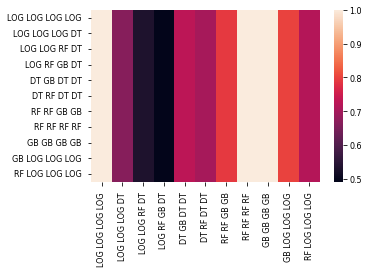

In [18]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2846.88it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


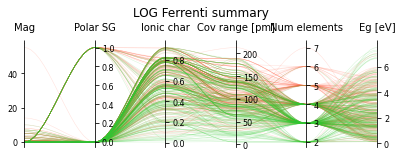

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3106.32it/s]


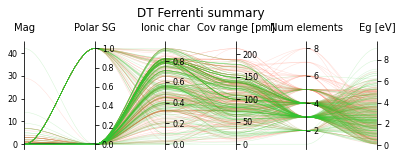

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3081.21it/s]


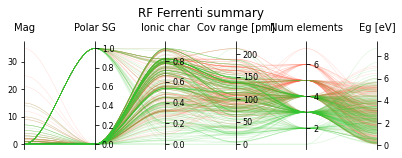

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2776.59it/s]


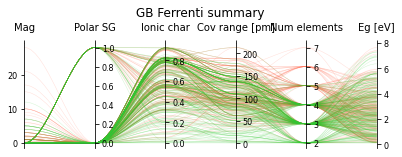

In [19]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)